# Supervised Machine Learning - Regression Analysis

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Hypothesis
         3A. Hypothesis 1:
                  - Data prep for regression analysis
                  - Regression Analysis
         3B. Hypothesis 2:
                  - Data prep for regression analysis
                  - Regression Analysis        


#### Bonus: performance improvement after removing outliers

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# show matplotlib visualizations in the notebook
%matplotlib inline

In [3]:
path = r'/Users/azadehrezaei/Desktop/NAEP Results Analysis/02 Data'

In [4]:
# Importing the assessment results:
df = pd.read_csv(os.path.join(path, 'Original Data', 'states_all_updated.csv'))

I decided to use the original data here. Originally, I only kept the odd years (2009-2019) since the NAEP assessments are help every other year. During this part, I want to take a look at the State Revenue and since the revenue and instruction expeditures during the even years can equally affect the assessment results and student performance, I will be using the data for ALL years available. 

## 2. Data Cleaning


In [5]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'A_A_A', 'G04_A_A', 'G08_A_A', 'G04_AM_F',
       'G04_AM_M', 'G04_AS_F', 'G04_AS_M', 'G04_BL_F', 'G04_BL_M', 'G04_HI_F',
       'G04_HI_M', 'G04_HP_F', 'G04_HP_M', 'G04_TR_F', 'G04_TR_M', 'G04_WH_F',
       'G04_WH_M', 'G08_AM_F', 'G08_AM_M', 'G08_AS_F', 'G08_AS_M', 'G08_BL_F',
       'G08_BL_M', 'G08_HI_F', 'G08_HI_M', 'G08_HP_F', 'G08_HP_M', 'G08_TR_F',
       'G08_TR_M', 'G08_WH_F', 'G08_WH_M', 'G04_A_A_READING',
       'G04_A_A_MATHEMATICS', 'G04_A_M_READING', 'G04_A_M_MATHEMATICS',
       'G04_A_F_READING', 'G04_A_F_MATHEMATICS', 'G04_WH_A_READING',
       'G04_WH_A_MATHEMATICS', 'G04_BL_A_READING', 'G04_BL_A_MATHEMATICS',
       'G04_HI_A_READING', 'G04_HI_A_MATHEMATICS', 'G04_AS_A_READING',
       'G04_AS

I already have the columns I want in this set amd will use subsets to do my analysis if needed. 
I do however want to remove some of the rows. 
We only have the demographics data for students starting the yeat 2011 so I am going to create a subset for that. I also want to look at the revenue starting the year 2003 (including the even years).
So this means I will be deleting all teh rows prior to 2003. 
I will also delet the rows for the state value of DODEA (Department of Defense Education Activity) and NATIONAL:

In [6]:
# Only keeping the rows for the years 2003 and after:
df = df[df['YEAR'] > 2002]

In [7]:
# Delete the rows with the values "NATIONAL" or "DODEA" in the STATE column:

df = df.drop(df[df['STATE'].isin(['NATIONAL', 'DODEA'])].index)

In [8]:
# Checking out the name os states to make sure NATIONAL and DODEA are removed:

df['STATE'].value_counts(dropna = False)

ALABAMA                 16
PENNSYLVANIA            16
NEVADA                  16
NEW_HAMPSHIRE           16
NEW_JERSEY              16
NEW_MEXICO              16
NEW_YORK                16
NORTH_CAROLINA          16
NORTH_DAKOTA            16
OHIO                    16
OKLAHOMA                16
OREGON                  16
RHODE_ISLAND            16
MONTANA                 16
SOUTH_CAROLINA          16
SOUTH_DAKOTA            16
TENNESSEE               16
TEXAS                   16
UTAH                    16
VERMONT                 16
VIRGINIA                16
WASHINGTON              16
WEST_VIRGINIA           16
WISCONSIN               16
NEBRASKA                16
MISSOURI                16
ALASKA                  16
IDAHO                   16
ARIZONA                 16
ARKANSAS                16
CALIFORNIA              16
COLORADO                16
CONNECTICUT             16
DELAWARE                16
DISTRICT_OF_COLUMBIA    16
FLORIDA                 16
GEORGIA                 16
H

In [9]:
df.shape

(816, 84)

I am going to create two subsets of the df to use for two separate regression analyses:

- **Revenue Analysis**: 
    - 2003 and later years, keeping ALL the years
- **Math Results Analysis**:  
    - 2003 and later years and only the odd years. The reaosn for this is that: 1) NAEP results have been consistently reported since 2003 and 2) the NAEP assessments are held on odd years only

In [10]:
# df subset for revenue analysis:
df_rev = df

# df subset for NAEP results analysis:
df_res = df.drop(df[df['YEAR'].isin([2004, 2006, 2008, 2010, 2012, 2014, 2016])].index) # there is no YEAR 2018


In [11]:
df_res['YEAR'].value_counts(dropna = False) # includes District of Columbia

2003    51
2005    51
2007    51
2009    51
2011    51
2013    51
2015    51
2017    51
2019    51
Name: YEAR, dtype: int64

## 3. Hypothesis

Hypotheses from Exercise 6.1:

**3A. Hypothesis 1:**
        
    Does the federal/state and local revenue correlate with the scores in grades 4 and 8 NAEP Assessments?

I am using this specific hypothesis based on this research question:

- If a state has a higher Instruction Expenditure, then the average Mathematics and Reading Assessment scores (in either 4th or 8th grade level) in that state are higher. 

**3B. Hypothesis 2:**

    Is there a correlation between federal/state/local revenue and instruction expenditure and is there a correlation between instruction expenditure and average NAEP assessment scores?

I am using this specific hypothesis based on this research question:

- If a state has a higher total revenue, then that state has a higher alocated instruction expenidture. 






## 3A. Hypothesis 1:

- If a state has a higher Instruction Expenditure, then the average Mathematics and Reading Assessment scores (in either 4th or 8th grade level) in that state are higher. 
For this hypothesis I am going to perform one regression analysis only instead of all the four for each grade level and eahc subject. 

I am using the Instruction Expenditure and 8th grade Mathematics Average Assessment Score. 

#### Data Prep for Regression Analysis

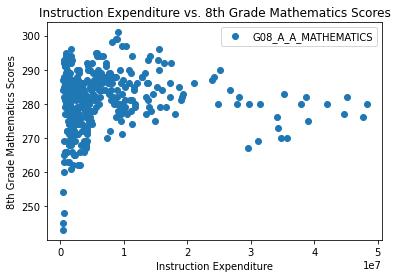

In [12]:
# Create a scatterplot using matplotlib to look at the chosen variables plotted against eachother:
df_res.plot(x = 'INSTRUCTION_EXPENDITURE', y='G08_A_A_MATHEMATICS',style='o')
plt.title('Instruction Expenditure vs. 8th Grade Mathematics Scores')  
plt.xlabel('Instruction Expenditure')  
plt.ylabel('8th Grade Mathematics Scores')  
plt.show()

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df_res['INSTRUCTION_EXPENDITURE'].values.reshape(-1,1)
y1 = df_res['G08_A_A_MATHEMATICS'].values.reshape(-1,1)

In [14]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#### Regression Analysis

In [15]:
# Create a regression object

regression_1 = LinearRegression()

In [16]:
# Fit the regression object onto the training set

regression_1.fit(X1_train, y1_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y1_predicted = regression_1.predict(X1_test)

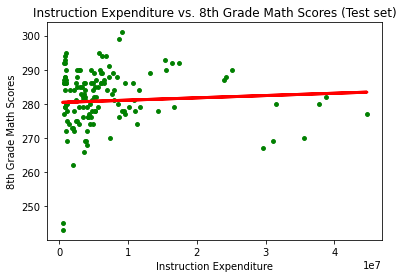

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test1 = plt
plot_test1.scatter(X1_test, y1_test, color='green', s = 15)
plot_test1.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test1.title('Instruction Expenditure vs. 8th Grade Math Scores (Test set)')
plot_test1.xlabel('Instruction Expenditure')
plot_test1.ylabel('8th Grade Math Scores')
plot_test1.show()

In [19]:
# Create objects that contain the model summary statistics.

rmse_1 = mean_squared_error(y1_test, y1_predicted) # mean squared error
r2_1 = r2_score(y1_test, y1_predicted)             # R2 score. 

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.


print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[6.73327059e-08]]
Mean squared error:  73.0284615368355
R2 score:  -0.01494445024761104


- Uh oh.. This is not good! 




In [22]:
y1_predicted

array([[280.49935532],
       [280.74839031],
       [280.71324661],
       [280.65164123],
       [280.8110207 ],
       [280.81824954],
       [280.58137288],
       [280.46717897],
       [280.60666251],
       [280.45475925],
       [280.48423751],
       [280.65093208],
       [281.16383499],
       [281.36672978],
       [280.58114482],
       [280.94091761],
       [280.68939589],
       [280.46611444],
       [280.89010115],
       [281.01367727],
       [280.45634453],
       [280.90002619],
       [280.59614595],
       [280.46793033],
       [280.84401279],
       [280.6942295 ],
       [281.50485347],
       [280.62924899],
       [280.50509092],
       [280.97360926],
       [280.65960682],
       [280.47384908],
       [280.60485866],
       [281.19531391],
       [280.46475189],
       [280.46949555],
       [280.64856931],
       [280.92245512],
       [280.7177779 ],
       [280.57046606],
       [280.81017251],
       [282.95241312],
       [280.54758405],
       [280

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data_1.head(30)

,Actual,Predicted
0,274.0,280.499355
1,282.0,280.748390
2,286.0,280.713247
3,282.0,280.651641
4,286.0,280.811021
5,289.0,280.818250
6,275.0,280.581373
7,280.0,280.467179
8,285.0,280.606663
9,287.0,280.454759


##### Compare how the regression fits the training set

In [24]:
# Predict.

y1_predicted_train = regression_1.predict(X1_train) # This is predicting X_train!

In [25]:
rmse_1 = mean_squared_error(y1_train, y1_predicted_train)
r2_1 = r2_score(y1_train, y1_predicted_train)


In [26]:
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[6.73327059e-08]]
Mean squared error:  61.85975472112043
R2 score:  0.0044250462998267626


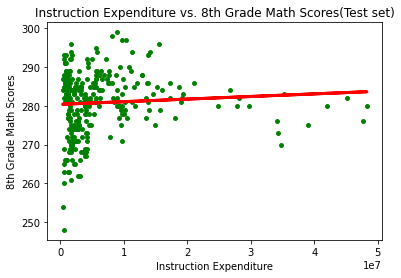

In [27]:
# Visualizing the training set results.

plot_test_1 = plt
plot_test_1.scatter(X1_train, y1_train, color='green', s = 15)
plot_test_1.plot(X1_train, y1_predicted_train, color='red', linewidth =3)
plot_test_1.title('Instruction Expenditure vs. 8th Grade Math Scores(Test set)')
plot_test_1.xlabel('Instruction Expenditure')
plot_test_1.ylabel('8th Grade Math Scores')
plot_test_1.show()

### **Interpretation:**

The slope is 6.73327059e-08 which is a very small positive number (0.0000000673327059). This doesn't say much about the hypothesis BUT the Mean Squared Error is 73 which is a very big difference when we consider the context of this analysis. 73 points is the difference between a stundet meeting NAEP Basic level or being Proficient.
What's more is that the R2 score is -0.0149 which is very close to zero and basically shows that the regression line is a very poor fit in this hypothesis. 

This all basically means that the model is not performing well! This shows that the Instruction Expenditure is NOT the only factor affecting assessment scores. The cluster of points on the left hand side of this plot also confirms that a single regression line is not the most accurate prediction model in this analysis. 





## 3B. Hypothesis 2:

If a state has a higher total revenue, then that state has a higher alocated instruction expenidture. 

For this hypothesis I am looking at the "TOTAL REVENUE" and "INSTRUCTION EXPENDITURE"

#### Data Prep for Regression Analysis

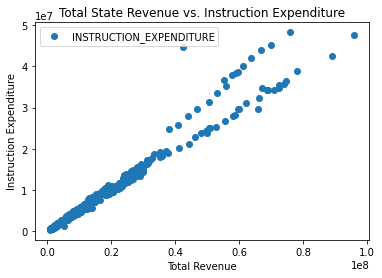

In [28]:
# Create a scatterplot using matplotlib to look at the chosen variables plotted against eachother:
df_rev.plot(x = 'TOTAL_REVENUE', y='INSTRUCTION_EXPENDITURE',style='o')
plt.title('Total State Revenue vs. Instruction Expenditure')  
plt.xlabel('Total Revenue')  
plt.ylabel('Instruction Expenditure')  
plt.show()

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df['TOTAL_REVENUE'].values.reshape(-1,1)
y2 = df['INSTRUCTION_EXPENDITURE'].values.reshape(-1,1)

In [30]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#### Regression Analysis

In [31]:
# Create a regression object

regression_2 = LinearRegression() 

In [32]:
# Fit the regression object onto the training set

regression_2.fit(X2_train, y2_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y2_predicted = regression_2.predict(X2_test)

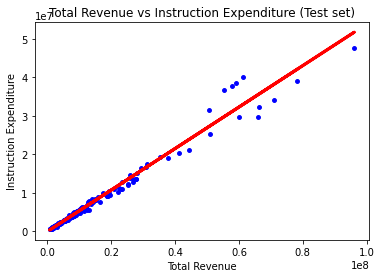

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color='blue', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test2.title('Total Revenue vs Instruction Expenditure (Test set)')
plot_test2.xlabel('Total Revenue')
plot_test2.ylabel('Instruction Expenditure')
plot_test2.show()

In [35]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y2_test, y2_predicted) # mean squared error
r2_2 = r2_score(y2_test, y2_predicted) # R2 score. 

In [36]:
# Print the model summary statistics. 

print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[6.73327059e-08]]
Mean squared error:  1465052831591.7002
R2 score:  0.9761990178719787


In [37]:
y2_predicted

array([[42108111.15467531],
       [ 5159867.16426263],
       [32337494.30192335],
       [ 7265299.06482338],
       [ 1240505.21304251],
       [ 4290289.13837418],
       [27400155.95655099],
       [ 6744371.57640564],
       [23797929.67581454],
       [ 1523544.21231645],
       [ 1006655.01361719],
       [15715718.78304618],
       [  437293.43983065],
       [ 3643436.70162567],
       [ 5869169.6580798 ],
       [ 9968462.13221242],
       [ 4415579.84561738],
       [  362106.69802579],
       [ 1064027.90054882],
       [  997745.92522287],
       [ 4020089.46932761],
       [ 2113817.91409135],
       [  521964.62501984],
       [  746547.01707115],
       [31699334.85779829],
       [18889926.33134036],
       [ 5276134.79259236],
       [ 5481746.67715674],
       [  863764.38631393],
       [ 2255763.12239698],
       [ 4650668.27380989],
       [ 3259315.12384238],
       [ 3654407.88391371],
       [ 3553335.02971405],
       [ 3673612.85531205],
       [  744675.087

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data_2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data_2.head(30)

,Actual,Predicted
0,38951948.0,4.210811e+07
1,5290595.0,5.159867e+06
2,29624968.0,3.233749e+07
3,7140620.0,7.265299e+06
4,1414919.0,1.240505e+06
5,4785880.0,4.290289e+06
6,25155007.0,2.740016e+07
7,7521325.0,6.744372e+06
8,21061312.0,2.379793e+07
9,1700085.0,1.523544e+06


##### Compare how the regression fits the training set

In [39]:
# Predict.

y2_predicted_train = regression_2.predict(X2_train) # This is predicting X_train!

In [40]:
rmse_2 = mean_squared_error(y2_train, y2_predicted_train)
r2_2 = r2_score(y2_train, y2_predicted_train)

In [42]:
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.54023943]]
Mean squared error:  2053207176326.686
R2 score:  0.9655338951099539


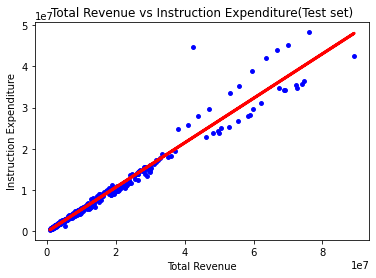

In [44]:
# Visualizing the training set results.

plot_test2 = plt
plot_test2.scatter(X2_train, y2_train, color='blue', s = 15)
plot_test2.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test2.title('Total Revenue vs Instruction Expenditure(Test set)')
plot_test2.xlabel('Total Revenue')
plot_test2.ylabel('Instruction Expenditure')
plot_test2.show()

### **Interpretation:**

Well, this is nice! And what I expected...

There seems to be 3 clusters in this scatterplot however that I can look more into in the next section. 
The slope is 0.54023943 which shows positive correlation between the two variables and the R2 of 0.9655338951099539 shows that this model is performing well and supports the hypothesis in this section. 